In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

Шаг 1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)

In [2]:
data = datasets.fetch_california_housing()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])


In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [4]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Шаг 2. Проверьте данные на наличие пропусков. Удалите их в случае обнаружения.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<AxesSubplot:>

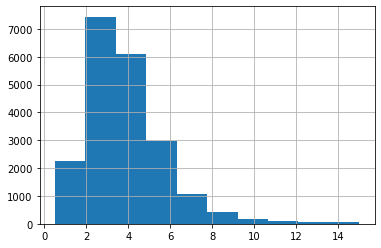

In [7]:
df['MedInc'].hist()

<AxesSubplot:>

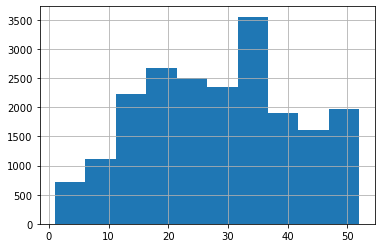

In [8]:
df['HouseAge'].hist()

<AxesSubplot:>

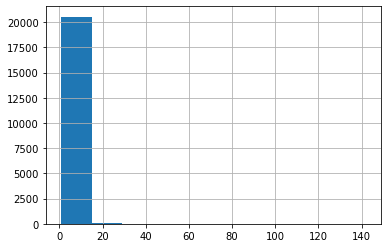

In [9]:
df['AveRooms'].hist()

<AxesSubplot:>

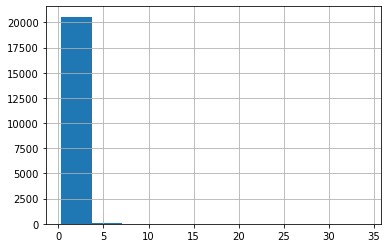

In [10]:
df['AveBedrms'].hist()

<AxesSubplot:>

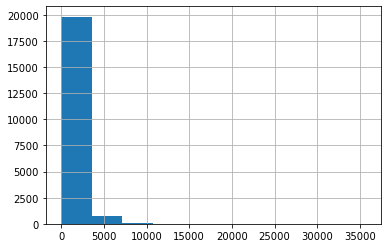

In [11]:
df['Population'].hist()

<AxesSubplot:>

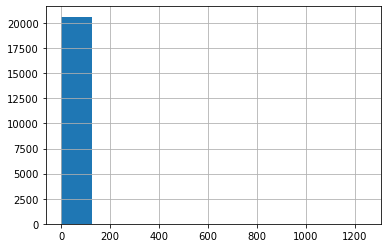

In [12]:
df['AveOccup'].hist()

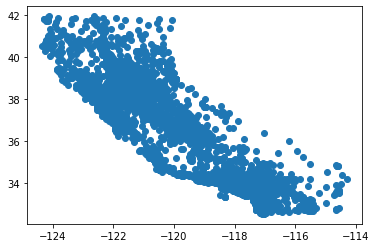

In [13]:
import matplotlib.pyplot as plt
plt.scatter(df['Longitude'],df['Latitude'])
plt.show()

Шаг 3. Разделите выборку на обучающее и тестовое подмножества. 80% данных оставить на обучающее множество, 20% - на тестовое.

Шаг 4. Постройте модель линейной регрессии. Вычислите метрики RMSE, R2 на обучающем и тестовом множестве.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


def get_score(X,y, random_seed=42, model=None):
    if model is None:
        model = LinearRegression()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed) 

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)


    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    return "Train_RMSE:{}, Train_R2:{}, Test_RMSE:{}, Test_R2:{}".format(mean_squared_error(y_train,y_pred_train, squared = False),
                                                                               r2_score(y_train, y_pred_train),
                                                                               mean_squared_error(y_test,y_pred_test, squared = False),
                                                                               r2_score(y_test, y_pred_test)) 

In [25]:
X = df[['MedInc','HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df['MedHouseVal']
get_score(X, y)

'Train_RMSE:0.7196757085831575, Train_R2:0.6125511913966952, Test_RMSE:0.7455813830127764, Test_R2:0.5757877060324508'

Шаг 5. Постройте график распределения целевой переменной. Сделайте вывод. Присутствуют ли в этом признаке выбросы?

<AxesSubplot:>

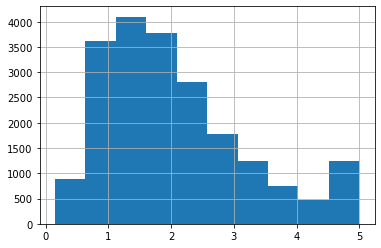

In [26]:
df['MedHouseVal'].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x1e747618310>,
 'caps': [<matplotlib.lines.Line2D at 0x1e747618970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e747608e80>],
 'medians': [<matplotlib.lines.Line2D at 0x1e7476230d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e747623460>],
 'means': []}

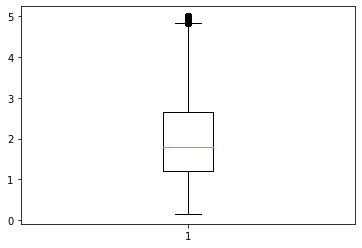

In [33]:
import matplotlib.pyplot as plt
plt.boxplot(y)

In [46]:
outlier_high = np.quantile(y, 0.75) + 1.5*(np.quantile(y, 0.75)-np.quantile(y, 0.25))
outlier_high

4.824124999999999

In [47]:
df_v1 = df[df['MedHouseVal'] < outlier_high]
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19569 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       19569 non-null  float64
 1   HouseAge     19569 non-null  float64
 2   AveRooms     19569 non-null  float64
 3   AveBedrms    19569 non-null  float64
 4   Population   19569 non-null  float64
 5   AveOccup     19569 non-null  float64
 6   Latitude     19569 non-null  float64
 7   Longitude    19569 non-null  float64
 8   MedHouseVal  19569 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB


In [53]:
X = df_v1[['MedInc','HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']]
y = df_v1['MedHouseVal']
get_score(X, y)

'Train_RMSE:0.6273342212975433, Train_R2:0.5662399734391856, Test_RMSE:0.6072589861493275, Test_R2:0.6012592989543193'

Шаг 6. Посчитайте и выведите корреляционную матрицу. Убедитесь, что ячейки матрицы поделены на цветные категории, в ячейках указано числовое значение корреляции.
a. Сделайте выводы.
b. Удалите признаки на основании полученных значений, выводов.
c. Повторите п. 3, п. 4 на измененных данных.

<AxesSubplot:>

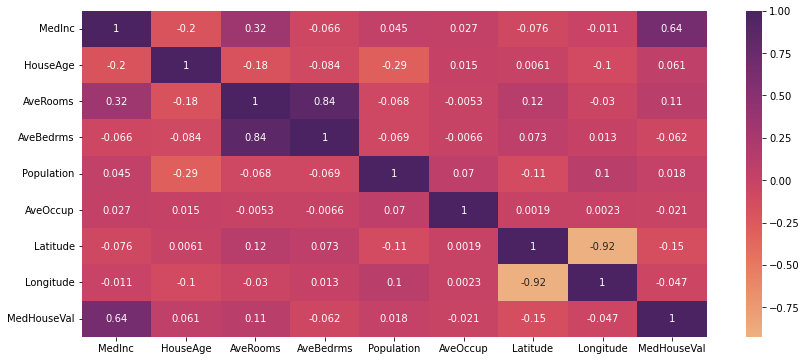

In [54]:
import seaborn as sns
plt.figure(figsize=(14,6))
sns.heatmap(pd.concat([X,y], axis=1).corr(), cmap='flare',annot=True)

In [55]:
X = df_v1[['MedInc','HouseAge','AveRooms', 'Population']]
y = df_v1['MedHouseVal']
get_score(X, y)

'Train_RMSE:0.7040619640183053, Train_R2:0.4536469973555194, Test_RMSE:0.6894531006937291, Test_R2:0.4860130104101912'

Шаг 7. Исследуйте оставленные признаки на выбросы.
a. Удалите выбросы в случае обнаружения.
b. Повторите п. 3, п. 4 на измененных данных.

{'whiskers': [<matplotlib.lines.Line2D at 0x1e74982a340>,
 'caps': [<matplotlib.lines.Line2D at 0x1e74982aa60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e74981ef70>],
 'medians': [<matplotlib.lines.Line2D at 0x1e7498361c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e749836550>],
 'means': []}

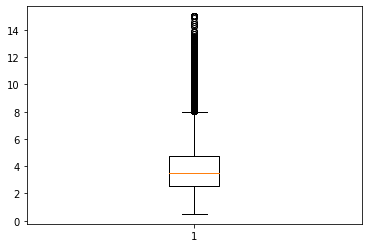

In [56]:
plt.boxplot(df['MedInc'])

In [57]:
outlier_high_medinc = np.quantile(df['MedInc'], 0.75) + 1.5*(np.quantile(df['MedInc'], 0.75)-np.quantile(df['MedInc'], 0.25))
outlier_high_medinc

8.013024999999999

{'whiskers': [<matplotlib.lines.Line2D at 0x1e749a7f760>,
 'caps': [<matplotlib.lines.Line2D at 0x1e749a7fe80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e749a7f3d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e749a8c5e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e749a8c970>],
 'means': []}

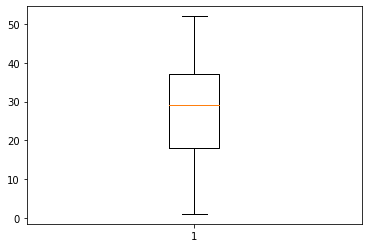

In [58]:
plt.boxplot(df['HouseAge'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e749aef040>,
 'caps': [<matplotlib.lines.Line2D at 0x1e749aef760>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e749adfc70>],
 'medians': [<matplotlib.lines.Line2D at 0x1e749aefe80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e749afa250>],
 'means': []}

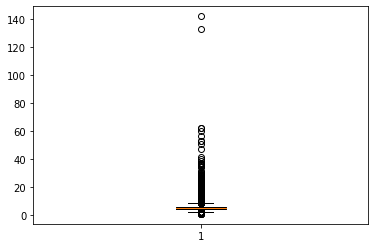

In [59]:
plt.boxplot(df['AveRooms'])

In [60]:
outlier_high_averooms = np.quantile(df['AveRooms'], 0.75) + 1.5*(np.quantile(df['AveRooms'], 0.75)-np.quantile(df['AveRooms'], 0.25))
outlier_high_averooms

8.469878027106942

{'whiskers': [<matplotlib.lines.Line2D at 0x1e749b5a580>,
 'caps': [<matplotlib.lines.Line2D at 0x1e749b5aca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e749b5a1f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1e749b66400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e749b66790>],
 'means': []}

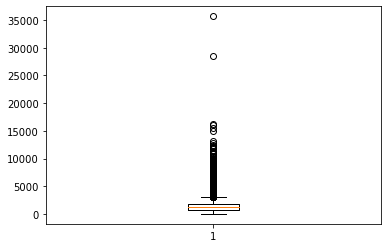

In [61]:
plt.boxplot(df['Population'])

In [62]:
outlier_high_pop = np.quantile(df['Population'], 0.75) + 1.5*(np.quantile(df['Population'], 0.75)-np.quantile(df['Population'], 0.25))
outlier_high_pop

3132.0

In [64]:
df_v2 = df[((df['MedInc'] < outlier_high_medinc) & (df['AveRooms'] < outlier_high_averooms) & (df['Population'] < outlier_high_pop))]
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18461 entries, 2 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       18461 non-null  float64
 1   HouseAge     18461 non-null  float64
 2   AveRooms     18461 non-null  float64
 3   AveBedrms    18461 non-null  float64
 4   Population   18461 non-null  float64
 5   AveOccup     18461 non-null  float64
 6   Latitude     18461 non-null  float64
 7   Longitude    18461 non-null  float64
 8   MedHouseVal  18461 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [65]:
X = df_v2[['MedInc','HouseAge','AveRooms','Population']]
y = df_v2['MedHouseVal']
get_score(X, y)

'Train_RMSE:0.7801049582358103, Train_R2:0.4712416773028424, Test_RMSE:0.7846448316419552, Test_R2:0.4750416423152328'

Шаг 8. Измените несколько признаков на выбор математически. Например, вычислите логарифм, возведите в квадрат, извлеките квадратный корень.
a. Повторите п. 3, п. 4 на измененных данных.

In [67]:
df_v3 = df_v2
df_v3['log_AveRooms'] = np.log(df_v2['AveRooms'])
df_v3.head()

C:\Users\79653\AppData\Local\Temp/ipykernel_4348/2655664208.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_v3['log_AveRooms'] = np.log(df_v2['AveRooms'])


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,log_AveRooms
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,2.114825
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1.760845
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1.837665
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697,1.560596
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992,1.595726


In [68]:
X = df_v3[['MedInc','HouseAge','log_AveRooms','Population']]
y = df_v3['MedHouseVal']
get_score(X, y)

'Train_RMSE:0.775704224452002, Train_R2:0.47719052112855675, Test_RMSE:0.7805145634394512, Test_R2:0.48055372144825337'

Шаг 9. Сформулируйте выводы по проделанной работе.
a. Кратко опишите какие преобразования были сделаны с данными.
b. Сравните метрики всех моделей. Желательно оформление в виде таблицы вида |модель|RMSE|R2|признаки, на которых проводилось обучение с указанием их преобразований|.
c. Напишите свое мнение, в полной ли мере модели справились с поставленной задачей.
Для получения зачета по этому домашнему заданию, минимально, должно быть реализовано обучение трех моделей классификации: на основе всех неизмененных признаков; на основе признаков, отобранных по значениям корреляций; на основе признаков, отобранных по значениям корреляций и с удалением выбросов в них. Должны быть выведены метрики RMSE, R2 моделей. Желательно добиться улучшения метрик.

Необработанные признаки:
'Train_RMSE:0.7196757085831575, Train_R2:0.6125511913966952, Test_RMSE:0.7455813830127764, Test_R2:0.5757877060324508'
Без выбросов целевого признака:
'Train_RMSE:0.6273342212975433, Train_R2:0.5662399734391856, Test_RMSE:0.6072589861493275, Test_R2:0.6012592989543193'
Отобранные признаки по матрице корреляции:
'Train_RMSE:0.7040619640183053, Train_R2:0.4536469973555194, Test_RMSE:0.6894531006937291, Test_R2:0.4860130104101912'
Без выбросов признаков, отобранных по матрице корреляции:
'Train_RMSE:0.7801049582358103, Train_R2:0.4712416773028424, Test_RMSE:0.7846448316419552, Test_R2:0.4750416423152328'
Изменение признака математически:
'Train_RMSE:0.775704224452002, Train_R2:0.47719052112855675, Test_RMSE:0.7805145634394512, Test_R2:0.48055372144825337'
Улучшения метрик путем предложенных преобразований не удалось достичь